# L3线性回归算法

1，分别编写一个用广义逆和梯度下降法来求最小误差平方和最佳解的算法

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

data_global = [
  [1, 0.2, 0.7, 1],
  [1, 0.3, 0.3, 1],
  [1, 0.4, 0.5, 1],
  [1, 0.6, 0.5, 1],
  [1, 0.1, 0.4, 1],
  [1, 0.4, 0.6, -1],
  [1, 0.6, 0.2, -1],
  [1, 0.7, 0.4, -1],
  [1, 0.8, 0.6, -1],
  [1, 0.7, 0.5 ,-1],
]


def generalized_inverse():
  start = time.time()

  data = np.array(data_global)
  X = np.mat(data[:,:-1])
  Y = np.transpose(np.mat(data[:,-1]))

  generalized_inverse_X = np.linalg.inv((np.transpose(X) * X)) * (np.transpose(X))
  w = generalized_inverse_X * Y

  end = time.time()
  print("generalized_inverse w:\n",w)
  print("generalized_inverse time:",end - start)

def gradient_descent(max_count = 100000, rate = 0.01):
  start = time.time()

  data = np.array(data_global)
  X = np.mat(data[:,:-1])
  Y = np.transpose(np.mat(data[:,-1]))
  const_A = np.transpose(X) * X
  const_B = np.transpose(X) * Y

  count = 0
  w = np.transpose(np.mat([.0,.0,.0]))
  while count < max_count:
    delta_w = (const_A * w - const_B)
    if(np.all(abs(delta_w) < 1e-6)):
      break
    w -= rate * delta_w
    count += 1


  end = time.time()
  print("gradient_descent w:\n",w)
  print("gradient_descent iteration:",count)
  print("gradient_descent time:",end - start)

generalized_inverse()
gradient_descent()

generalized_inverse w:
 [[ 1.4312148 ]
 [-3.21802092]
 [ 0.24135157]]
generalized_inverse time: 0.0008556842803955078
gradient_descent w:
 [[ 1.43121123]
 [-3.21801982]
 [ 0.24135794]]
gradient_descent iteration: 7501
gradient_descent time: 0.3490943908691406


2.生成正态分布数据进行训练与测试


generalized_inverse w:
 [-0.06448369 -0.19527819 -0.17210456]
generalized_inverse time: 0.0003323554992675781
traing accuracy: 1.0


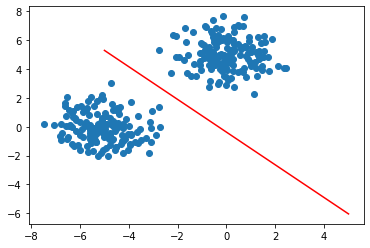


gradient_descent w:
 [-0.06448365 -0.19527818 -0.17210457]
gradient_descent iteration: 5930
gradient_descent time: 0.21892189979553223
traing accuracy: 1.0


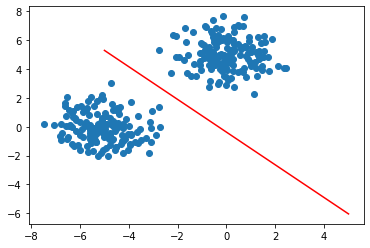


generalized_inverse_test accuracy: 1.0

generalized_inverse_test L(w): [[0.0750772]]


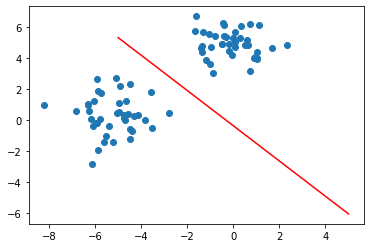


gradient_descent_test accuracy: 1.0

gradient_descent_test L(w): [[0.0750772]]


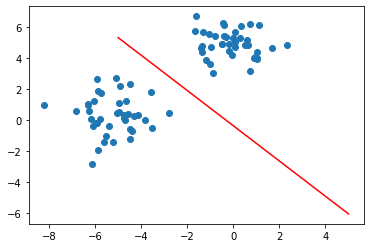

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

X1 = np.random.multivariate_normal((-5,0), [[1,0],[0,1]], (200,), 'ignore') #二维正态分布

X2 = np.random.multivariate_normal((0,5), [[1,0],[0,1]], (200,), 'ignore')

X1_train = X1[:-40]
X1_test = X1[-40:]
X2_train = X2[:-40]
X2_test = X2[-40:]

data_generalized_inverse_train = np.vstack((np.c_[np.ones(len(X1_train)),X1_train,np.ones(len(X1_train))],\
            np.c_[np.ones(len(X2_train)),X2_train,[-1] * len(X2_train)]))   #合并数据

data_gradient_descent_train = data_generalized_inverse_train

data_generalized_inverse_test = np.vstack((np.c_[np.ones(len(X1_test)),X1_test,np.ones(len(X1_test))],\
            np.c_[np.ones(len(X2_test)),X2_test,[-1] * len(X2_test)]))

data_gradient_descent_test = data_generalized_inverse_test


def sign(num):
  if num>=0:
    return 1
  else:
    return -1

def generalized_inverse():
  start = time.time()

  data = np.array(data_generalized_inverse_train)
  X = np.mat(data[:,:-1])
  Y = np.transpose(np.mat(data[:,-1]))

  generalized_inverse_X = np.linalg.inv((np.transpose(X) * X)) * (np.transpose(X)) #广义逆公式
  w = generalized_inverse_X * Y

  end = time.time()
  w = np.array(np.transpose(w)).reshape(3)  #变更格式
  print("\ngeneralized_inverse w:\n",w)
  print("generalized_inverse time:",end - start)

  error = 0
  for i in range(0,len(data)):
    now_Y = sign(np.dot(w,np.transpose(X[i])))
    if Y[i] == now_Y:
      continue
    error += 1
  print("traing accuracy:",(len(X)-error)/len(X))

  X = data[:,:-1]
  plot_x = np.linspace(-5,5,1000)
  plot_y = -(w[1]/w[2])*plot_x - w[0]/w[2]
  plt.plot(plot_x, plot_y, 'r')
  plt.scatter(X[:, 1], X[:, 2])
  plt.show()

  return w

def gradient_descent(max_count = 100000, rate = 0.0001):
  start = time.time()

  data = np.array(data_gradient_descent_train)
  X = np.mat(data[:,:-1])
  Y = np.transpose(np.mat(data[:,-1]))
  const_A = np.transpose(X) * X
  const_B = np.transpose(X) * Y

  count = 0
  w = np.transpose(np.mat([.0,.0,.0]))
  while count < max_count:
    delta_w = (const_A * w - const_B)   #更新迭代
    if(np.all(abs(delta_w) < 1e-6)):
      break
    w -= rate * delta_w
    count += 1


  end = time.time()
  w = np.array(np.transpose(w)).reshape(3)  #变更格式

  print("\ngradient_descent w:\n",w)
  print("gradient_descent iteration:",count)
  print("gradient_descent time:",end - start)

  error = 0
  for i in range(0,len(data)):
    now_Y = sign(np.dot(w,np.transpose(X[i])))
    if Y[i] == now_Y:
      continue
    error += 1
  print("traing accuracy:",(len(X)-error)/len(X))

  X = data[:,:-1]
  plot_x = np.linspace(-5,5,1000)
  plot_y = -(w[1]/w[2])*plot_x - w[0]/w[2]
  plt.plot(plot_x, plot_y, 'r')
  plt.scatter(X[:, 1], X[:, 2])
  plt.show()

  return w

def generalized_inverse_test(w):
  data = np.array(data_generalized_inverse_test)
  X = np.mat(data[:,:-1])
  Y = np.transpose(np.mat(data[:,-1]))

  error = 0
  for i in range(0,len(data)):
    now_Y = sign(np.dot(w,np.transpose(X[i])))
    if Y[i] == now_Y:
      continue
    error += 1

  
  print("\ngeneralized_inverse_test accuracy:",(len(X)-error)/len(X))
  print("\ngeneralized_inverse_test L(w):",np.transpose(X * np.transpose(np.mat(w)) - Y) * (X * np.transpose(np.mat(w)) - Y)/len(X))
  X = data[:,:-1]
  plot_x = np.linspace(-5,5,1000)
  plot_y = -(w[1]/w[2])*plot_x - w[0]/w[2]
  plt.plot(plot_x, plot_y, 'r')
  plt.scatter(X[:, 1], X[:, 2])
  plt.show()

def gradient_descent_test(w):
  data = np.array(data_gradient_descent_test)
  X = np.mat(data[:,:-1])
  Y = np.transpose(np.mat(data[:,-1]))

  error = 0
  for i in range(0,len(data)):
    now_Y = sign(np.dot(w,np.transpose(X[i])))
    if Y[i] == now_Y:
      continue
    error += 1

  
  print("\ngradient_descent_test accuracy:",(len(X)-error)/len(X))
  print("\ngradient_descent_test L(w):",np.transpose(X * np.transpose(np.mat(w)) - Y) * (X * np.transpose(np.mat(w)) - Y)/len(X))
  X = data[:,:-1]
  plot_x = np.linspace(-5,5,1000)
  plot_y = -(w[1]/w[2])*plot_x - w[0]/w[2]
  plt.plot(plot_x, plot_y, 'r')
  plt.scatter(X[:, 1], X[:, 2])
  plt.show()


generalized_inverse_w = generalized_inverse()
gradient_descent_w = gradient_descent()
generalized_inverse_test(generalized_inverse_w)
gradient_descent_test(gradient_descent_w)

3.更改正态分布均值

--------------------------------------------------------------------------------------------------------------------------

generalized_inverse w:
 [-0.04266137  0.37883628 -0.29084833]
generalized_inverse time: 0.0011143684387207031
traing accuracy: 0.7375


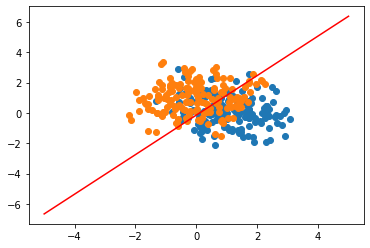

--------------------------------------------------------------------------------------------------------------------------

gradient_descent w:
 [-0.04266136  0.37883628 -0.29084834]
gradient_descent iteration: 1034
gradient_descent time: 0.1049339771270752
traing accuracy: 0.7375


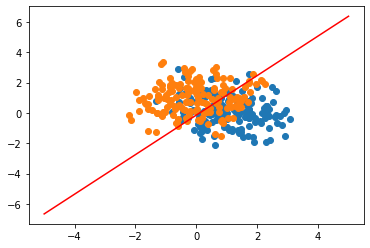

epoch-loss


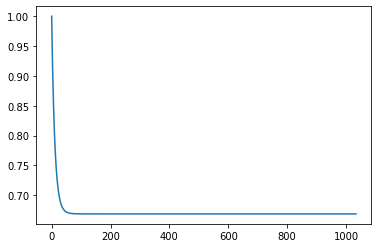

--------------------------------------------------------------------------------------------------------------------------

generalized_inverse_test accuracy: 0.7875

generalized_inverse_test L(w): [[0.67260084]]


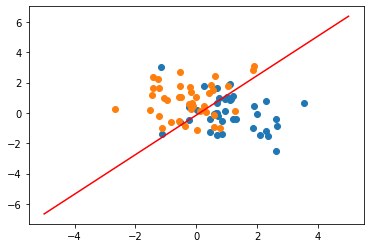

--------------------------------------------------------------------------------------------------------------------------

gradient_descent_test accuracy: 0.7875

gradient_descent_test L(w): [[0.67260084]]


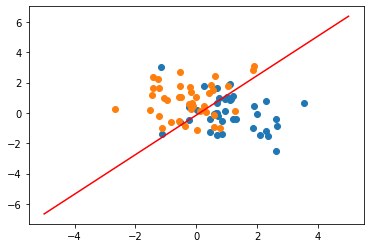

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

X1 = np.random.multivariate_normal((1,0), [[1,0],[0,1]], (200,), 'ignore') #二维正态分布

X2 = np.random.multivariate_normal((0,1), [[1,0],[0,1]], (200,), 'ignore')

X1_train = X1[:-40]
X1_test = X1[-40:]
X2_train = X2[:-40]
X2_test = X2[-40:]

data_generalized_inverse_train = np.vstack((np.c_[np.ones(len(X1_train)),X1_train,np.ones(len(X1_train))],\
            np.c_[np.ones(len(X2_train)),X2_train,[-1] * len(X2_train)]))   #合并数据

data_gradient_descent_train = data_generalized_inverse_train

data_generalized_inverse_test = np.vstack((np.c_[np.ones(len(X1_test)),X1_test,np.ones(len(X1_test))],\
            np.c_[np.ones(len(X2_test)),X2_test,[-1] * len(X2_test)]))

data_gradient_descent_test = data_generalized_inverse_test

X1_train = np.array(X1_train)
X1_test = np.array(X1_test)
X2_train = np.array(X2_train)
X2_test = np.array(X2_test)

def sign(num):
  if num>=0:
    return 1
  else:
    return -1

def generalized_inverse():
  start = time.time()

  data = np.array(data_generalized_inverse_train)
  X = np.mat(data[:,:-1])
  Y = np.transpose(np.mat(data[:,-1]))

  generalized_inverse_X = np.linalg.inv((np.transpose(X) * X)) * (np.transpose(X)) #广义逆公式
  w = generalized_inverse_X * Y

  end = time.time()
  w = np.array(np.transpose(w)).reshape(3)  #变更格式
  print("--------------------------------------------------------------------------------------------------------------------------")
  print("\ngeneralized_inverse w:\n",w)
  print("generalized_inverse time:",end - start)

  error = 0
  for i in range(0,len(data)):
    now_Y = sign(np.dot(w,np.transpose(X[i])))
    if Y[i] == now_Y:
      continue
    error += 1
  print("traing accuracy:",(len(X)-error)/len(X))

  X = data[:,:-1]
  plot_x = np.linspace(-5,5,1000)
  plot_y = -(w[1]/w[2])*plot_x - w[0]/w[2]
  plt.plot(plot_x, plot_y, 'r')
  plt.scatter(X1_train[:,0],X1_train[:,1])
  plt.scatter(X2_train[:,0],X2_train[:,1])
  plt.show()

  return w

def gradient_descent(max_count = 100000, rate = 0.0001):
  start = time.time()

  data = np.array(data_gradient_descent_train)
  X = np.mat(data[:,:-1])
  Y = np.transpose(np.mat(data[:,-1]))
  const_A = np.transpose(X) * X
  const_B = np.transpose(X) * Y

  list_w = []
  count = 0
  w = np.transpose(np.mat([.0,.0,.0]))
  while count < max_count:
    list_w.append([count, (np.transpose(X * np.mat(w) - Y) * (X * np.mat(w) - Y)/len(X))[0,0]])
    delta_w = (const_A * w - const_B)   #更新迭代
    if(np.all(abs(delta_w) < 1e-6)):
      break
    w -= rate * delta_w
    count += 1


  end = time.time()
  w = np.array(np.transpose(w)).reshape(3)  #变更格式
  print("--------------------------------------------------------------------------------------------------------------------------")
  print("\ngradient_descent w:\n",w)
  print("gradient_descent iteration:",count)
  print("gradient_descent time:",end - start)

  error = 0
  for i in range(0,len(data)):
    now_Y = sign(np.dot(w,np.transpose(X[i])))
    if Y[i] == now_Y:
      continue
    error += 1
  print("traing accuracy:",(len(X)-error)/len(X))

  X = data[:,:-1]
  plot_x = np.linspace(-5,5,1000)
  plot_y = -(w[1]/w[2])*plot_x - w[0]/w[2]
  plt.plot(plot_x, plot_y, 'r')
  plt.scatter(X1_train[:,0],X1_train[:,1])
  plt.scatter(X2_train[:,0],X2_train[:,1])
  plt.show()

  list_w = np.array(list_w)
  print("epoch-loss")
  plt.plot(list_w[:,0],list_w[:,1])
  plt.show()
  return w

def generalized_inverse_test(w):
  data = np.array(data_generalized_inverse_test)
  X = np.mat(data[:,:-1])
  Y = np.transpose(np.mat(data[:,-1]))

  error = 0
  for i in range(0,len(data)):
    now_Y = sign(np.dot(w,np.transpose(X[i])))
    if Y[i] == now_Y:
      continue
    error += 1

  print("--------------------------------------------------------------------------------------------------------------------------")
  print("\ngeneralized_inverse_test accuracy:",(len(X)-error)/len(X))
  print("\ngeneralized_inverse_test L(w):",np.transpose(X * np.transpose(np.mat(w)) - Y) * (X * np.transpose(np.mat(w)) - Y)/len(X))
  X = data[:,:-1]
  plot_x = np.linspace(-5,5,1000)
  plot_y = -(w[1]/w[2])*plot_x - w[0]/w[2]
  plt.plot(plot_x, plot_y, 'r')
  plt.scatter(X1_test[:,0],X1_test[:,1])
  plt.scatter(X2_test[:,0],X2_test[:,1])
  plt.show()

def gradient_descent_test(w):
  data = np.array(data_gradient_descent_test)
  X = np.mat(data[:,:-1])
  Y = np.transpose(np.mat(data[:,-1]))

  error = 0
  for i in range(0,len(data)):
    now_Y = sign(np.dot(w,np.transpose(X[i])))
    if Y[i] == now_Y:
      continue
    error += 1

  print("--------------------------------------------------------------------------------------------------------------------------")
  print("\ngradient_descent_test accuracy:",(len(X)-error)/len(X))
  print("\ngradient_descent_test L(w):",np.transpose(X * np.transpose(np.mat(w)) - Y) * (X * np.transpose(np.mat(w)) - Y)/len(X))
  X = data[:,:-1]
  plot_x = np.linspace(-5,5,1000)
  plot_y = -(w[1]/w[2])*plot_x - w[0]/w[2]
  plt.plot(plot_x, plot_y, 'r')
  plt.scatter(X1_test[:,0],X1_test[:,1])
  plt.scatter(X2_test[:,0],X2_test[:,1])
  plt.show()


generalized_inverse_w = generalized_inverse()
gradient_descent_w = gradient_descent()
generalized_inverse_test(generalized_inverse_w)
gradient_descent_test(gradient_descent_w)

4.改变算法中的各类超参数、样本数量、样本分布等，对于梯度下降法还要改变不同的学习率以及不同的batch size和不同epoch次数，讨论实验结果。

1. 学习率rate越大，满足条件的迭代次数会先减小，然后当rate大到一定程度之后将得不出结果。  
2. 样本分布越开得到的结果越好，迭代次数越小。
3. 在上面代码基础上增加超参数batch_size，并且每次数据随机，代码如下。可以看到每次batch更新计算一次的loss曲线

--------------------------------------------------------------------------------------------------------------------------

generalized_inverse w:
 [-0.01690333  0.33517654 -0.32907543]
generalized_inverse time: 0.0006074905395507812
traing accuracy: 0.74375


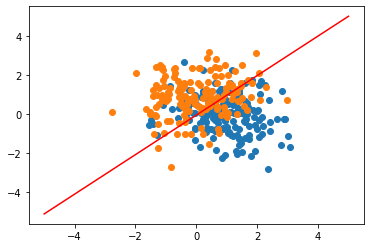

--------------------------------------------------------------------------------------------------------------------------

gradient_descent w:
 [-0.01685839  0.33516063 -0.32908516]
gradient_descent iteration: 1000
gradient_descent time: 1.0065720081329346
traing accuracy: 0.74375


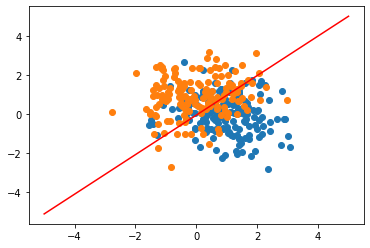

epoch-loss


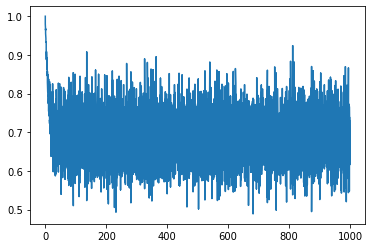

--------------------------------------------------------------------------------------------------------------------------

generalized_inverse_test accuracy: 0.7875

generalized_inverse_test L(w): [[0.5584652]]


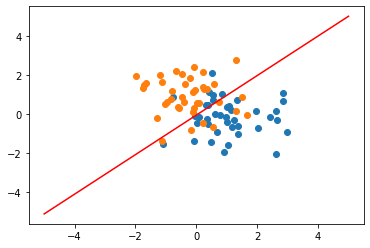

--------------------------------------------------------------------------------------------------------------------------

gradient_descent_test accuracy: 0.7875

gradient_descent_test L(w): [[0.55846593]]


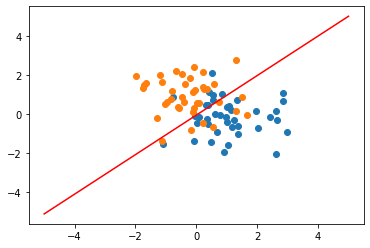

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import math

X1 = np.random.multivariate_normal((1,0), [[1,0],[0,1]], (200,), 'ignore') #二维正态分布

X2 = np.random.multivariate_normal((0,1), [[1,0],[0,1]], (200,), 'ignore')

X1_train = X1[:-40]
X1_test = X1[-40:]
X2_train = X2[:-40]
X2_test = X2[-40:]

data_generalized_inverse_train = np.vstack((np.c_[np.ones(len(X1_train)),X1_train,np.ones(len(X1_train))],\
            np.c_[np.ones(len(X2_train)),X2_train,[-1] * len(X2_train)]))   #合并数据

data_gradient_descent_train = data_generalized_inverse_train

data_generalized_inverse_test = np.vstack((np.c_[np.ones(len(X1_test)),X1_test,np.ones(len(X1_test))],\
            np.c_[np.ones(len(X2_test)),X2_test,[-1] * len(X2_test)]))

data_gradient_descent_test = data_generalized_inverse_test

X1_train = np.array(X1_train)
X1_test = np.array(X1_test)
X2_train = np.array(X2_train)
X2_test = np.array(X2_test)

def sign(num):
  if num>=0:
    return 1
  else:
    return -1

def list_split(items, n):
  return [items[i:i+n] for i in range(0, len(items), n)]

def generalized_inverse():
  start = time.time()

  data = np.array(data_generalized_inverse_train)
  X = np.mat(data[:,:-1])
  Y = np.transpose(np.mat(data[:,-1]))

  generalized_inverse_X = np.linalg.inv((np.transpose(X) * X)) * (np.transpose(X)) #广义逆公式
  w = generalized_inverse_X * Y

  end = time.time()
  w = np.array(np.transpose(w)).reshape(3)  #变更格式
  print("--------------------------------------------------------------------------------------------------------------------------")
  print("\ngeneralized_inverse w:\n",w)
  print("generalized_inverse time:",end - start)

  error = 0
  for i in range(0,len(data)):
    now_Y = sign(np.dot(w,np.transpose(X[i])))
    if Y[i] == now_Y:
      continue
    error += 1
  print("traing accuracy:",(len(X)-error)/len(X))

  X = data[:,:-1]
  plot_x = np.linspace(-5,5,1000)
  plot_y = -(w[1]/w[2])*plot_x - w[0]/w[2]
  plt.plot(plot_x, plot_y, 'r')
  plt.scatter(X1_train[:,0],X1_train[:,1])
  plt.scatter(X2_train[:,0],X2_train[:,1])
  plt.show()

  return w

def gradient_descent(batch_size = len(data_gradient_descent_train), max_count = 1000, rate = 0.0001):
  start = time.time()

  data = np.array(data_gradient_descent_train)
  X = np.mat(data[:,:-1])
  Y = np.transpose(np.mat(data[:,-1]))
  const_A = np.transpose(X) * X
  const_B = np.transpose(X) * Y

  list_w = []
  count = 0
  w = np.transpose(np.mat([.0,.0,.0]))
  while count < max_count:
    data = np.array(data_gradient_descent_train)
    np.random.shuffle(data)     #随机数据
    batch_data = np.array(list_split(data, batch_size))
    flag = 0
    for i in range(0, len(batch_data)):
      X = np.mat(batch_data[i][:,:-1])
      Y = np.transpose(np.mat(batch_data[i][:,-1]))
      const_A = np.transpose(X) * X
      const_B = np.transpose(X) * Y
      list_w.append([count, (np.transpose(X * np.mat(w) - Y) * (X * np.mat(w) - Y)/len(X))[0,0]])
      delta_w = (const_A * w - const_B)   #更新迭代
      if(np.all(abs(delta_w) < 1e-6)):
        flag = 1
        break
      w -= rate * delta_w
    count += 1
    if flag == 1:
      break


  end = time.time()
  w = np.array(np.transpose(w)).reshape(3)  #变更格式
  print("--------------------------------------------------------------------------------------------------------------------------")
  print("\ngradient_descent w:\n",w)
  print("gradient_descent iteration:",count)
  print("gradient_descent time:",end - start)

  error = 0
  data = np.array(data_gradient_descent_train)
  X = np.mat(data[:,:-1])
  Y = np.transpose(np.mat(data[:,-1]))
  for i in range(0,len(data)):
    now_Y = sign(np.dot(w,np.transpose(X[i])))
    if Y[i] == now_Y:
      continue
    error += 1
  print("traing accuracy:",(len(X)-error)/len(X))

  X = data[:,:-1]
  plot_x = np.linspace(-5,5,1000)
  plot_y = -(w[1]/w[2])*plot_x - w[0]/w[2]
  plt.plot(plot_x, plot_y, 'r')
  plt.scatter(X1_train[:,0],X1_train[:,1])
  plt.scatter(X2_train[:,0],X2_train[:,1])
  plt.show()

  list_w = np.array(list_w)
  print("epoch-loss")
  plt.plot(list_w[:,0],list_w[:,1])
  plt.show()
  return w

def generalized_inverse_test(w):
  data = np.array(data_generalized_inverse_test)
  X = np.mat(data[:,:-1])
  Y = np.transpose(np.mat(data[:,-1]))

  error = 0
  for i in range(0,len(data)):
    now_Y = sign(np.dot(w,np.transpose(X[i])))
    if Y[i] == now_Y:
      continue
    error += 1

  print("--------------------------------------------------------------------------------------------------------------------------")
  print("\ngeneralized_inverse_test accuracy:",(len(X)-error)/len(X))
  print("\ngeneralized_inverse_test L(w):",np.transpose(X * np.transpose(np.mat(w)) - Y) * (X * np.transpose(np.mat(w)) - Y)/len(X))
  X = data[:,:-1]
  plot_x = np.linspace(-5,5,1000)
  plot_y = -(w[1]/w[2])*plot_x - w[0]/w[2]
  plt.plot(plot_x, plot_y, 'r')
  plt.scatter(X1_test[:,0],X1_test[:,1])
  plt.scatter(X2_test[:,0],X2_test[:,1])
  plt.show()

def gradient_descent_test(w):
  data = np.array(data_gradient_descent_test)
  X = np.mat(data[:,:-1])
  Y = np.transpose(np.mat(data[:,-1]))

  error = 0
  for i in range(0,len(data)):
    now_Y = sign(np.dot(w,np.transpose(X[i])))
    if Y[i] == now_Y:
      continue
    error += 1

  print("--------------------------------------------------------------------------------------------------------------------------")
  print("\ngradient_descent_test accuracy:",(len(X)-error)/len(X))
  print("\ngradient_descent_test L(w):",np.transpose(X * np.transpose(np.mat(w)) - Y) * (X * np.transpose(np.mat(w)) - Y)/len(X))
  X = data[:,:-1]
  plot_x = np.linspace(-5,5,1000)
  plot_y = -(w[1]/w[2])*plot_x - w[0]/w[2]
  plt.plot(plot_x, plot_y, 'r')
  plt.scatter(X1_test[:,0],X1_test[:,1])
  plt.scatter(X2_test[:,0],X2_test[:,1])
  plt.show()


generalized_inverse_w = generalized_inverse()
gradient_descent_w = gradient_descent(math.floor(len(data_gradient_descent_train)/4))
generalized_inverse_test(generalized_inverse_w)
gradient_descent_test(gradient_descent_w)

5.单变量函数为f(x)=x*cos⁡(0.25π*x)，分别用梯度下降法、随机梯度下降法、Adagrad、RMSProp、动量法（Momentum）和Adam共6种方法

iteration;10


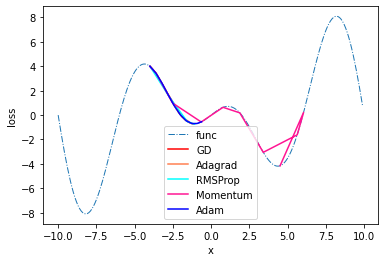

iteration;50


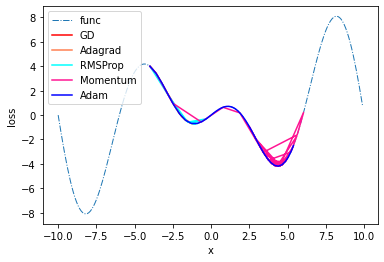

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import math

def func(x):
  return x * math.cos(0.25 * math.pi * x)
def func_derivative(x):
  return math.cos(0.25 * math.pi * x) - 0.25 * math.pi * x * math.sin(0.25 * math.pi * x)

def gradient_descent(max_count = 10, rate = 0.4):
  x = -4
  count = 0
  loss_list = []
  while count < max_count:        #梯度下降
    loss_list.append([x, func(x)])
    x = x - rate * func_derivative(x)
    count += 1 
  
  plt.xlabel("x")
  plt.ylabel("loss")
  loss_list = np.array(loss_list)
  plt.plot(loss_list[:,0],loss_list[:,1],color='r',label='GD')
  plt.legend()

  

def Adagrad(max_count = 10, rate = 0.4):
  x = -4
  count = 0
  loss_list = []
  zeta = 1e-6
  sum_square = 0
  while count < max_count:        #梯度下降
    loss_list.append([x, func(x)])
    sum_square += func_derivative(x)**2
    zeta = math.sqrt(sum_square/(count + 1)) + 1e-6
    x = x - rate * func_derivative(x) / zeta
    count += 1 
  plt.xlabel("x")
  plt.ylabel("loss")
  loss_list = np.array(loss_list)
  plt.plot(loss_list[:,0],loss_list[:,1],color='coral',label='Adagrad')
  plt.legend()

def RMSProp(max_count = 10, rate = 0.4):
  x = -4
  count = 0
  loss_list = []
  zeta = 1e-6
  apha = 0.9
  while count < max_count:        #梯度下降
    loss_list.append([x, func(x)])
    zeta = math.sqrt(apha * (zeta)**2 + (1-apha) * (func_derivative(x))**2) + 1e-6
    x = x - rate * func_derivative(x) / zeta
    count += 1 
  plt.xlabel("x")
  plt.ylabel("loss")
  loss_list = np.array(loss_list)
  plt.plot(loss_list[:,0],loss_list[:,1],color='aqua',label='RMSProp')
  plt.legend()

def Momentum(max_count = 10, rate = 0.4):
  x = -4
  count = 0
  loss_list = []
  m = 0
  lamda = 0.9
  while count < max_count:        #梯度下降
    loss_list.append([x, func(x)])
    m = lamda * m - rate * func_derivative(x)
    x = x + m
    count += 1 
  plt.xlabel("x")
  plt.ylabel("loss")
  loss_list = np.array(loss_list)
  plt.plot(loss_list[:,0],loss_list[:,1],color='deeppink',label='Momentum')
  plt.legend()

def Adam(max_count = 10, beta1 = 0.9, rate = 0.4):
  x = -4
  count = 0
  loss_list = []
  beta2 = 0.999
  m = 0 
  v = 0
  _beta1 = 1
  _beta2 = 1
  while count < max_count:        #梯度下降
    loss_list.append([x, func(x)])
    _beta1 *= beta1
    _beta2 *= beta2
    m = beta1 * m + (1 - beta1) * func_derivative(x)
    v = beta2 * v + (1 - beta2) * func_derivative(x)**2
    _m = m/(1 - _beta1)
    _v = v/(1 - _beta2)
    x = x - rate * _m /(math.sqrt(_v) + 1e-8)
    count += 1 
  plt.xlabel("x")
  plt.ylabel("loss")
  loss_list = np.array(loss_list)
  plt.plot(loss_list[:,0],loss_list[:,1],color='b',label='Adam')
  plt.legend()
x = np.arange(-10, 10, 0.1)
y = [func(x[i]) for i in range(0,len(x))]  
plt.plot(x,y,label = 'func',linewidth = '1',linestyle='-.')
print("iteration;10")
gradient_descent()
Adagrad()
RMSProp()
Momentum()
Adam()
plt.show()
print("iteration;50")
plt.plot(x,y,label = 'func',linewidth = '1',linestyle='-.')
gradient_descent(50)
Adagrad(50)
RMSProp(50)
Momentum(50)
Adam(50, 0.99)
plt.show()


可以看到动量法突破了局部最优解，而其他算法当迭代次数改为50，Adam的beta1改成0.99之后Adam也突破了局部最优。